In [10]:
import pandas as pd
pd.set_option('display.max_column', 250)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')
from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 5)
rcParams['figure.dpi'] = 150

In [3]:
import arff
data = arff.load(open('../data/Hyperplane.arff'))
cnames = [i[0] for i in data['attributes']]
df = pd.DataFrame(data['data'], columns=cnames)
df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,class
0,0.397174,0.347518,0.294057,0.506484,0.115967,0.770536,0.659893,0.156747,0.378202,0.139763,class1
1,0.004853,0.852254,0.023418,0.705010,0.275030,0.075388,0.610592,0.954931,0.274069,0.190202,class1
2,0.161043,0.178055,0.540397,0.973834,0.245427,0.394521,0.217602,0.432007,0.233156,0.889909,class1
3,0.112821,0.228802,0.991882,0.586248,0.962215,0.265155,0.362896,0.878429,0.290732,0.051448,class1
4,0.630405,0.909584,0.507660,0.491451,0.428784,0.308093,0.717322,0.962415,0.209493,0.172649,class2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
att1     50000 non-null float64
att2     50000 non-null float64
att3     50000 non-null float64
att4     50000 non-null float64
att5     50000 non-null float64
att6     50000 non-null float64
att7     50000 non-null float64
att8     50000 non-null float64
att9     50000 non-null float64
att10    50000 non-null float64
class    50000 non-null object
dtypes: float64(10), object(1)
memory usage: 4.2+ MB


In [4]:
df.describe()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.497826,0.498992,0.501466,0.498572,0.501146,0.497482,0.499257,0.499242,0.499457,0.501582
std,0.288800,0.288432,0.288350,0.288380,0.288833,0.288775,0.288475,0.287115,0.288250,0.288268
min,0.000022,0.000011,0.000007,0.000002,0.000017,0.000031,0.000021,0.000005,0.000013,0.000007
25%,0.246655,0.248157,0.252598,0.248785,0.251776,0.246994,0.248803,0.250618,0.249362,0.252940
50%,0.494405,0.499553,0.502864,0.498359,0.500993,0.497847,0.498836,0.497964,0.499566,0.502633
75%,0.746498,0.748472,0.749753,0.747738,0.751474,0.748228,0.748229,0.746166,0.749975,0.749603
max,0.999975,0.999994,0.999988,0.999975,0.999975,0.999991,0.999993,0.999979,0.999984,0.999988


In [6]:
df.groupby('class')['class'].count()

class
class1    24956
class2    25044
Name: class, dtype: int64

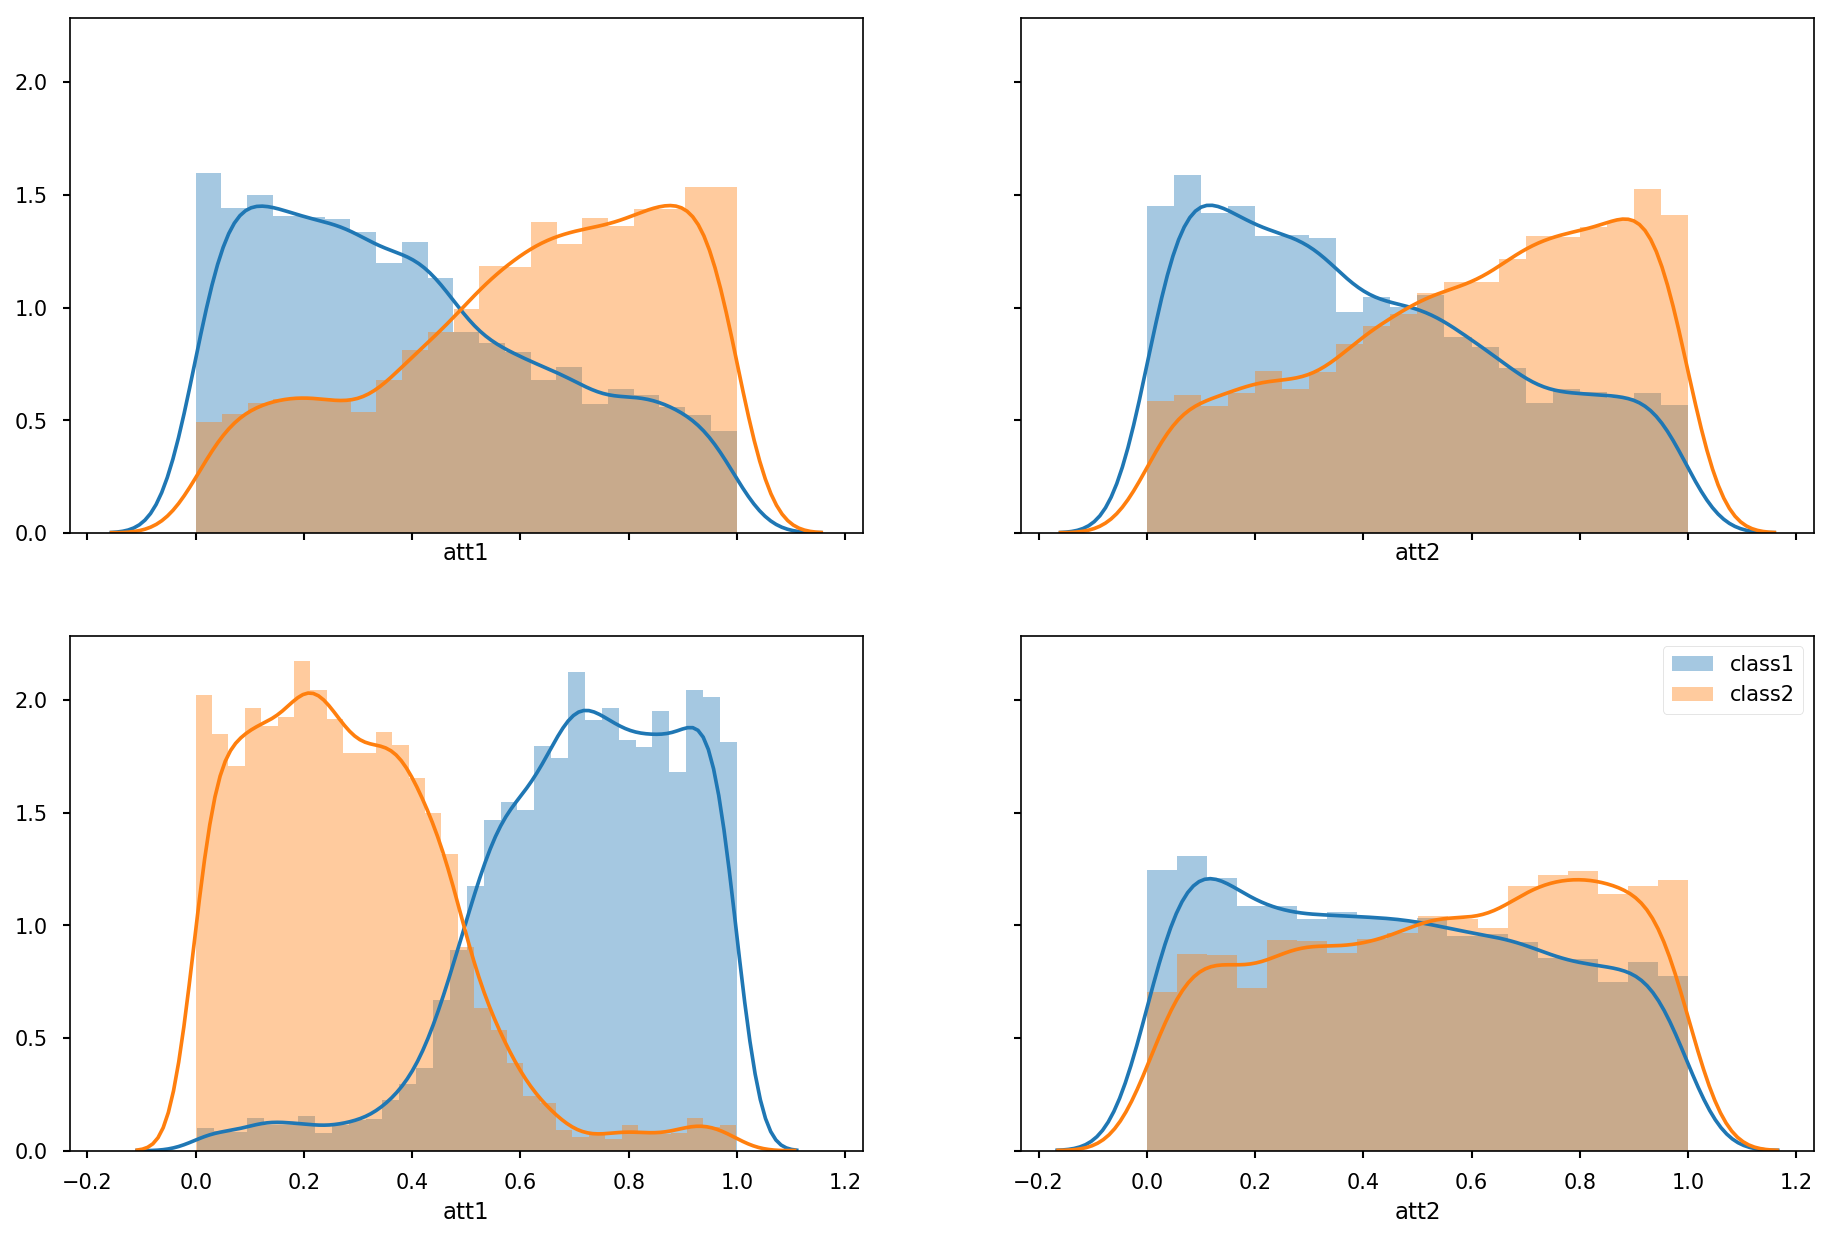

In [11]:
f, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,10))

for i in range(2):
    sns.distplot(df[df['class']=='class1'].loc[:10000,'att'+str(i+1)], ax=axes[0,i], label='class1')
    sns.distplot(df[df['class']=='class2'].loc[:10000,'att'+str(i+1)], ax=axes[0,i], label='class2')
    sns.distplot(df[df['class']=='class1'].loc[40000:,'att'+str(i+1)], ax=axes[1,i], label='class1')
    sns.distplot(df[df['class']=='class2'].loc[40000:,'att'+str(i+1)], ax=axes[1,i], label='class2')

plt.legend()

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [0] of <class 'int'>

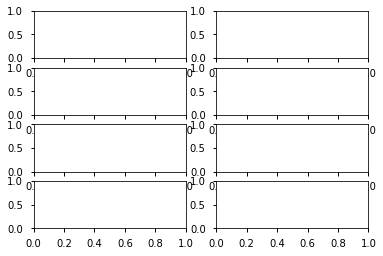

In [6]:
#todo. this does not work. Make it classwise
class_ = 'groupB'
f, axes = plt.subplots(4, 2)

for i in range(2):
    sns.distplot(df[df['class']== class_].loc[:12500,i], ax=axes[0,i])
    sns.distplot(df[df['class']== class_].loc[12500:25000,i], ax=axes[1,i])
    sns.distplot(df[df['class']== class_].loc[25000:37500,i], ax=axes[2,i])
    sns.distplot(df[df['class']== class_].loc[37500:,i], ax=axes[3,i])